<a href="https://colab.research.google.com/github/ladeiraA/Lab_BigData/blob/main/Atividade4Regrecao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
base = pd.read_csv("/content/machine.data", header = None)
base

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


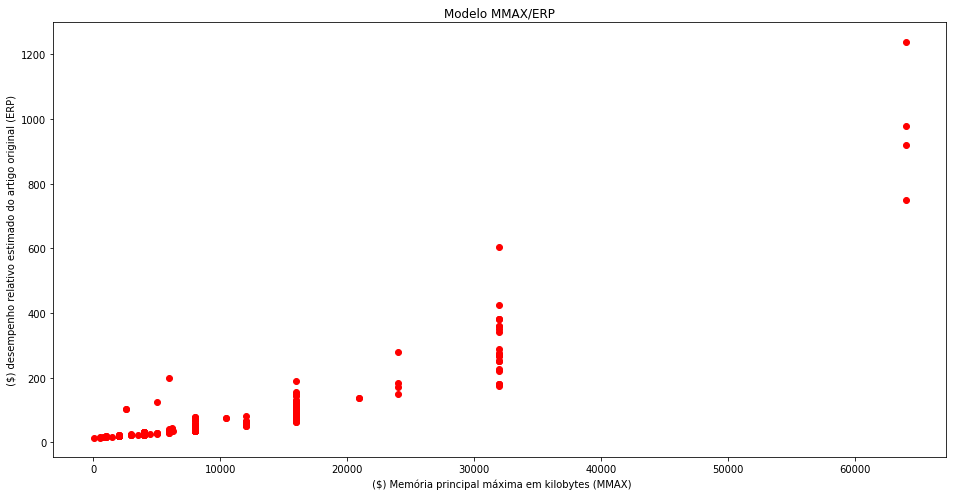

In [ ]:
plt.figure(figsize = (16,8))
plt.scatter(
    base[4],
    base[9],
    c = 'red')
plt.title ("Modelo MMAX/ERP")
plt.xlabel(" ($) Memória principal máxima em kilobytes (MMAX)")
plt.ylabel(" ($) desempenho relativo estimado do artigo original (ERP) ")
plt.show()

In [ ]:
x = base[4].values.reshape(-1,1)
y = base[9].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(x,y)
print("O modelo é ERP = {:.5} + {:.5}x ".format(reg.intercept_[0], reg.coef_[0][0]))

O modelo é ERP = -40.965 + 0.011893x 


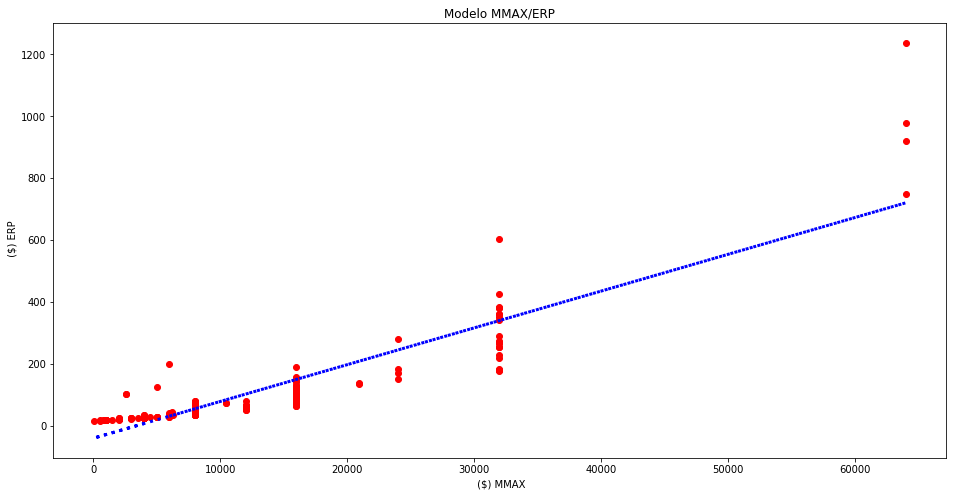

In [ ]:
f_previsoes = reg.predict(x)

plt.figure(figsize = (16,8))
plt.scatter(
    base[4],
    base[9],
    c = 'red')
plt.plot(
    base[4],
    f_previsoes,
    c='blue',
    linewidth=3,
    linestyle =':'
)
plt.title ("Modelo MMAX/ERP")
plt.xlabel(" ($) MMAX")
plt.ylabel(" ($) ERP")
plt.show()

In [ ]:
x = base[4]
y = base[9]
x2 = sm.add_constant(x)
est = sm.OLS(y, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     895.0
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           4.21e-77
Time:                        18:31:33   Log-Likelihood:                -1175.1
No. Observations:                 209   AIC:                             2354.
Df Residuals:                     207   BIC:                             2361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.9650      6.604     -6.203      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
xs = base.drop([9,1,0], axis =1)
y = base[9].values.reshape(-1,1)
rl = LinearRegression()
rl.fit(xs, y)

print("O modelo é: ERP= {:.5} + {:.5}*MYCT + {:.5}*MMIN + {:.5}* MMAX +{:.5}*CACH +{:.5}*CHMIN +{:.5}*CHMAX+ {:.5}*PRP".format(rl.intercept_[0], rl.coef_[0][0], rl.coef_[0][1], rl.coef_[0][2],rl.coef_[0][3],rl.coef_[0][4],rl.coef_[0][5], rl.coef_[0][6]))

O modelo é: ERP= -34.23 + 0.037771*MYCT + 0.005483*MMIN + 0.0033753* MMAX +0.12437*CACH +-0.016336*CHMIN +0.34576*CHMAX+ 0.57702*PRP


In [ ]:
xs

,2,3,4,5,6,7,8
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132
...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42
205,98,1000,8000,32,2,8,46
206,125,2000,8000,0,2,14,52
207,480,512,8000,32,0,0,67


In [ ]:
x =np.column_stack((base[2], base[3], base[4],  base[5],  base[6],  base[7],  base[8]))
y= base[9]

x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      9   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     679.5
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          3.60e-136
Time:                        18:31:33   Log-Likelihood:                -1014.8
No. Observations:                 209   AIC:                             2046.
Df Residuals:                     201   BIC:                             2072.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.2296      4.732     -7.234      0.0